In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd

In [2]:
###### AFTER APPLYING ALL 5 folds on test set, calculate DICE/HAUSDORFF
import monai.metrics as met
import torch, numpy as np, warnings
# this is the function to one-hot-encode data
def onehot(outs, targ, argmax=True):
    # Metrics requiring one hot encoded targets, pass through sigmoid or softmax
    # convert to one hot encoded target...
    shape = targ.size()
    batch = shape[0]
    # calculate argmax...
    if argmax is True:
        outs = torch.softmax(outs, dim=1)
        outs = torch.argmax(outs, dim=1)
    
    class_ = torch.max(targ)
    print(class_)
    
    if len(shape) == 4:
        sh = (batch, class_ + 1, shape[1], shape[2], shape[3])
        targets_dice = torch.zeros(sh, dtype=torch.float)
        targets_out = torch.zeros(sh, dtype=torch.float)
    else:
        sh = (1, class_ + 1, shape[0], shape[1], shape[2])
        targets_dice = torch.zeros(sh, dtype=torch.float)
        targets_out = torch.zeros(sh, dtype=torch.float)

    for i in range( class_ + 1):
        targets_dice[0, i][targ == i] = 1
        targets_out[0, i][outs == i] = 1

    return targets_out, targets_dice

def fix_outputs(out_, val=292):
    # Parotids...
    sl = out_[:,:,:val//2]
    sl[sl==6] = 7
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==7] = 6
    out_[:,:,val//2:]=sl

    # # Acoustics...
    sl = out_[:,:,:val//2]
    sl[sl==8] = 9
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==9] = 8
    out_[:,:,val//2:]=sl

    # Plexus
    sl = out_[:,:,:val//2]
    sl[sl==11] = 10
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==10] = 11
    out_[:,:,val//2:]=sl

    # Lens
    sl = out_[:,:,:val//2]
    sl[sl==12] = 13
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==13] = 12
    out_[:,:,val//2:]=sl

    # Eyes
    sl = out_[:,:,:val//2]
    sl[sl==14] = 15
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==15] = 14
    out_[:,:,val//2:]=sl

    # Eyes
    sl = out_[:,:,:val//2]
    sl[sl==14] = 15
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==15] = 14
    out_[:,:,val//2:]=sl

    # # Optic Nerves...
    sl = out_[:,:,:val//2]
    sl[sl==16] = 17
    out_[:,:,:val//2] = sl
    sl = out_[:,:,val//2:]
    sl[sl==17] = 16
    out_[:,:,val//2:]=sl
    
    return out_

In [4]:
outputs = torch.from_numpy(np.load('/Users/joemarsilla/Downloads/mastrotest/outs_0_FULL.npy'))
targets = torch.from_numpy(np.load('/Users/joemarsilla/Downloads/mastrotest/targ_0_FULL.npy'))
# outputs_, targets_ = onehot(outputs, targets, argmax=False)
# outputs = fix_outputs(outputs)
# outputs, targets = onehot(outputs, targets, argmax=False)

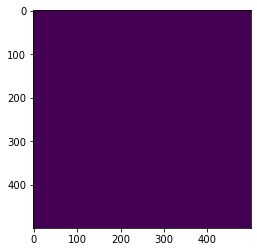

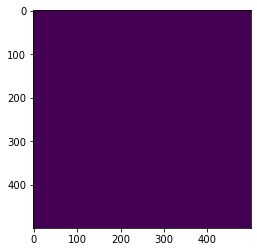

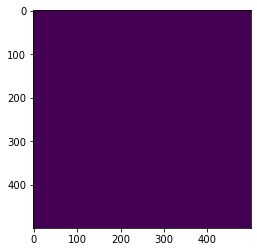

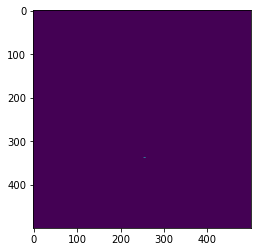

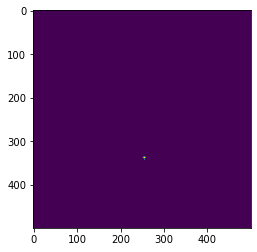

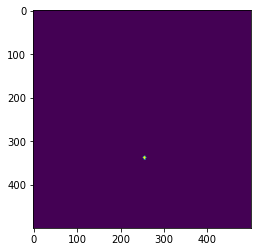

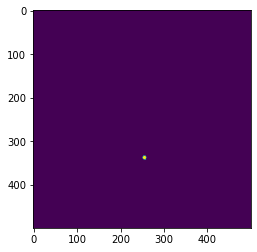

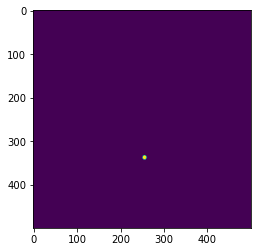

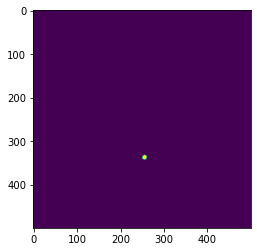

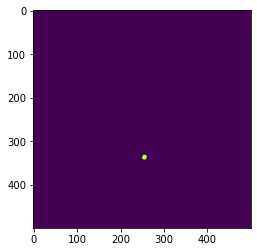

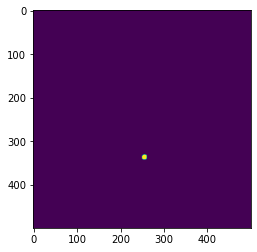

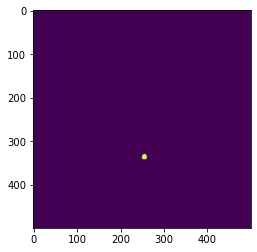

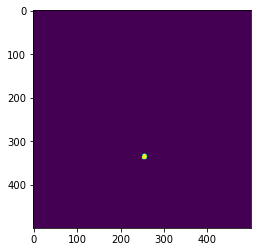

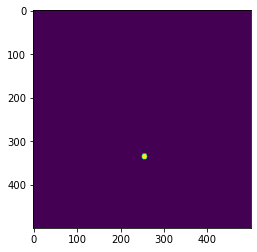

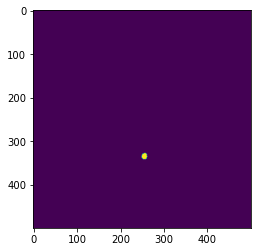

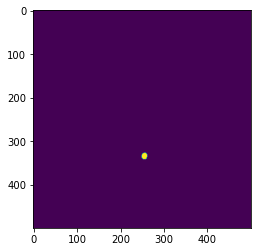

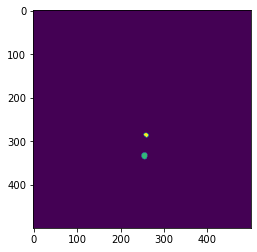

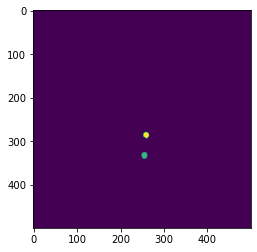

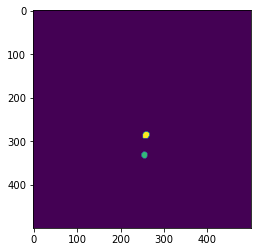

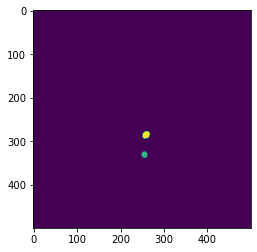

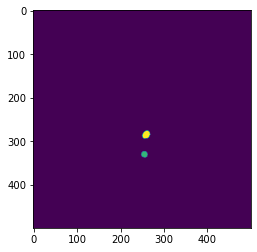

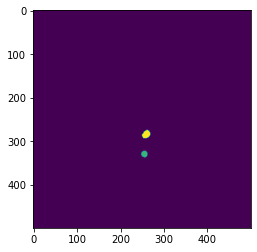

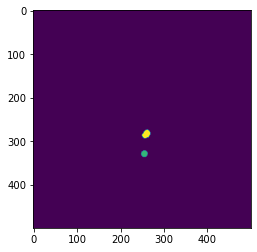

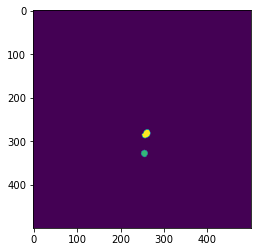

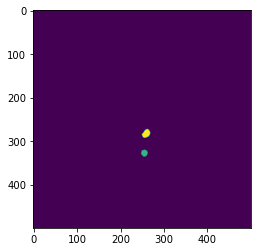

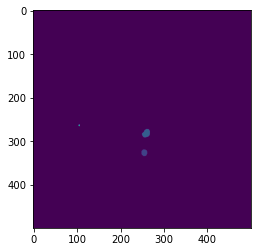

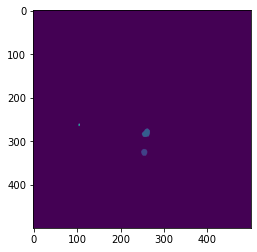

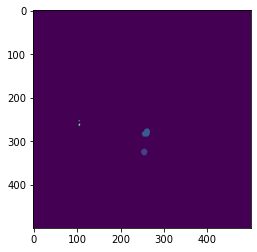

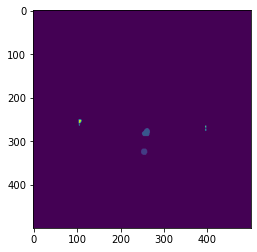

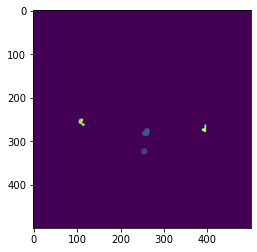

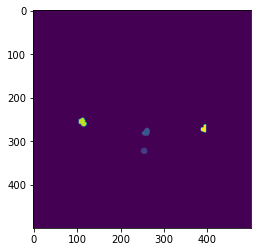

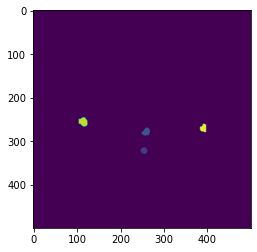

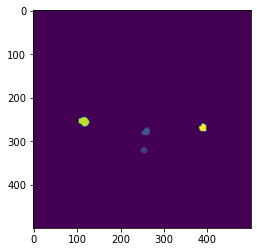

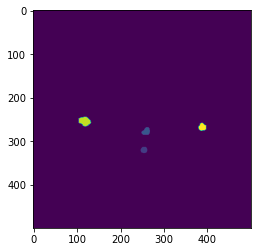

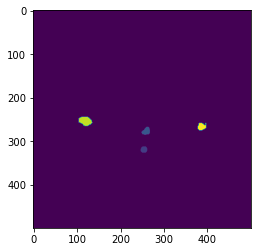

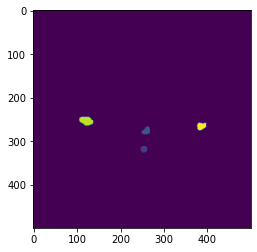

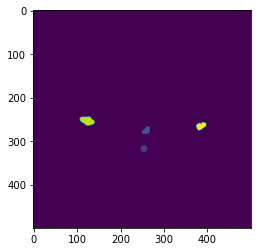

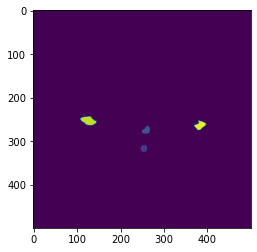

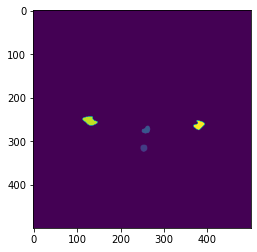

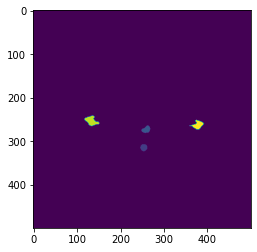

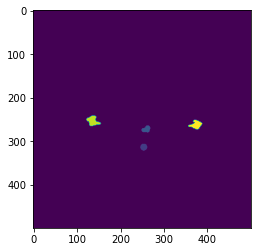

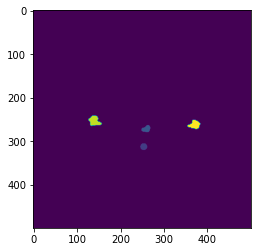

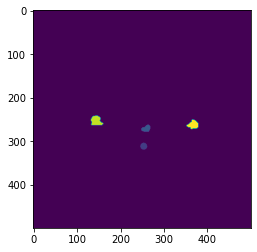

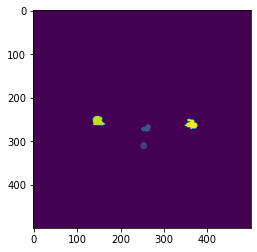

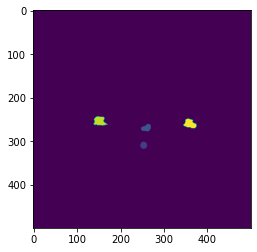

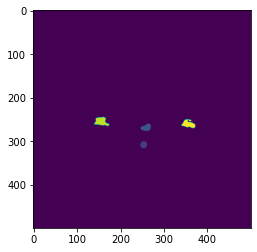

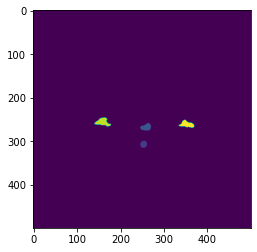

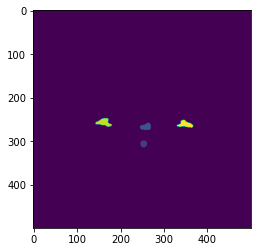

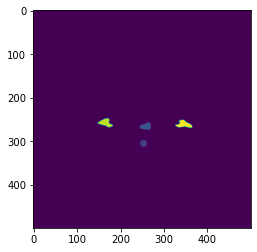

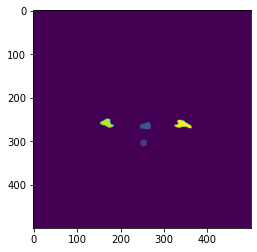

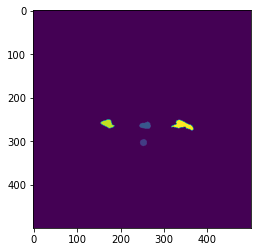

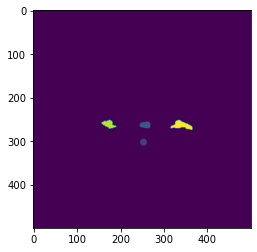

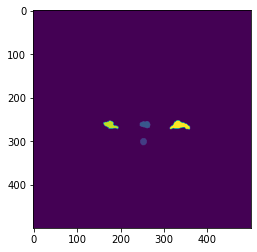

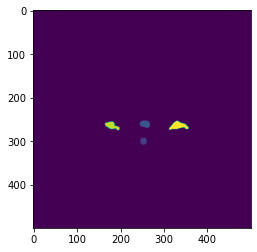

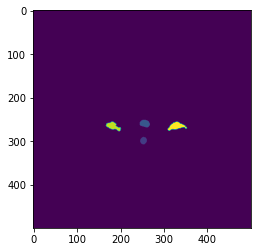

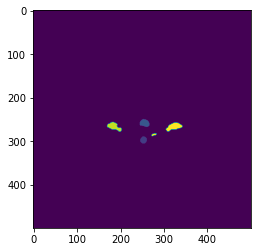

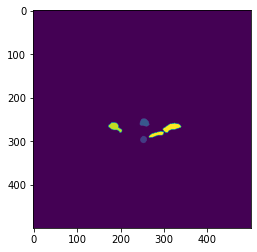

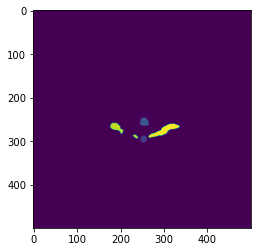

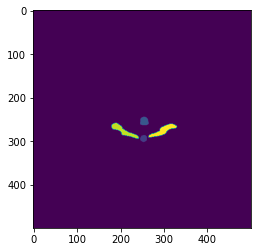

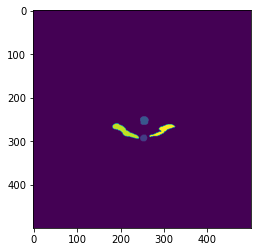

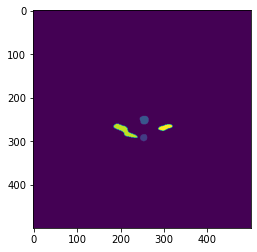

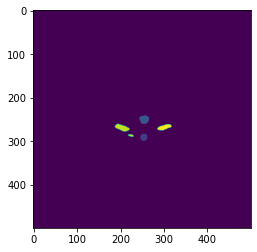

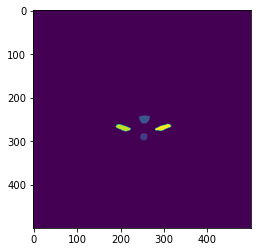

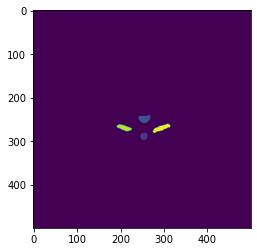

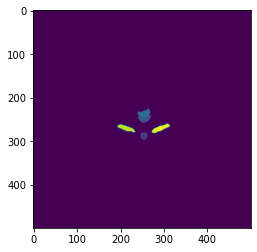

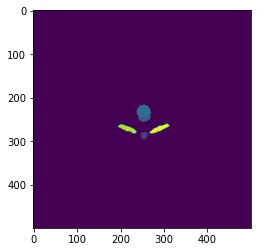

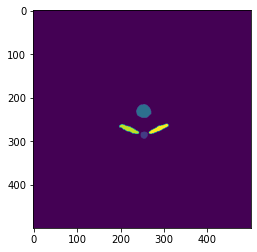

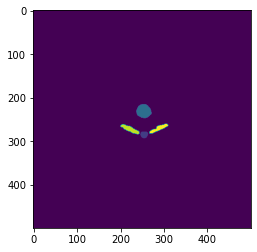

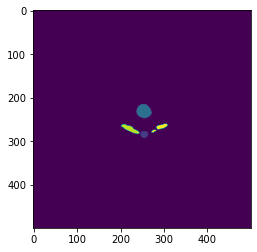

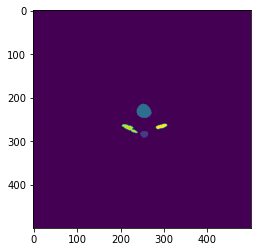

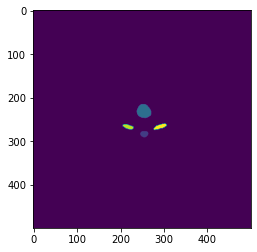

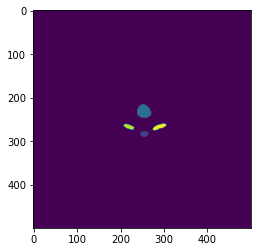

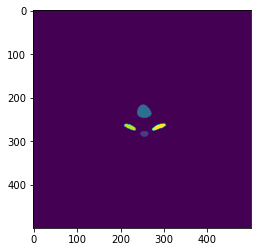

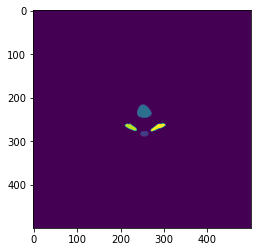

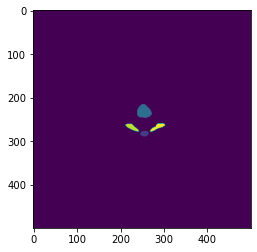

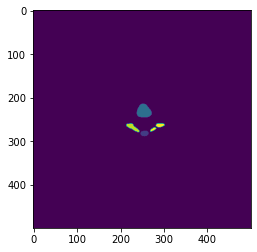

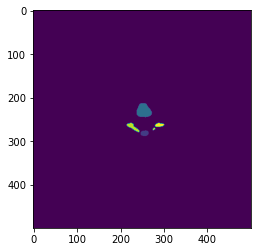

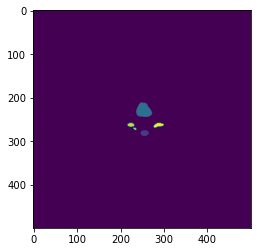

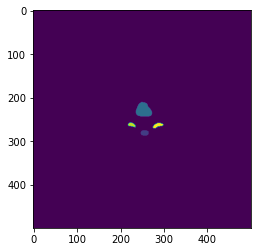

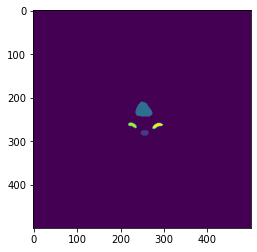

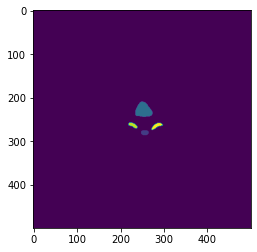

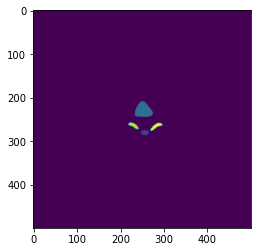

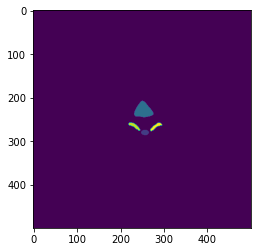

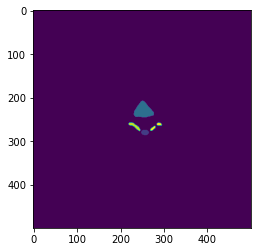

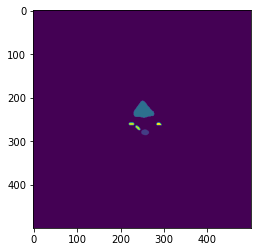

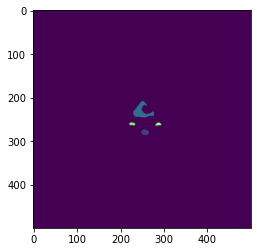

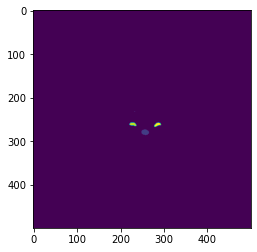

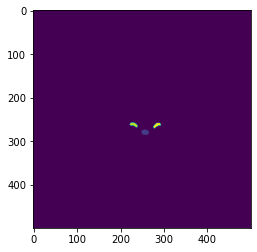

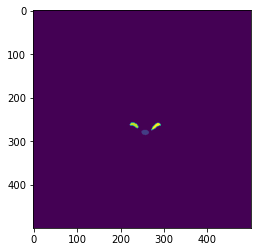

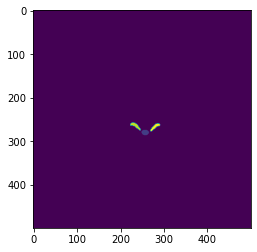

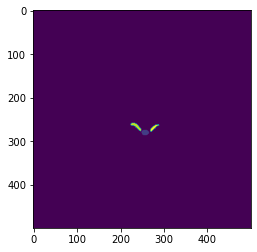

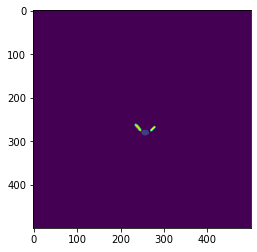

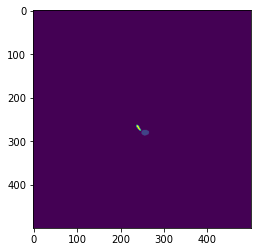

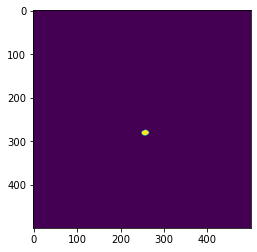

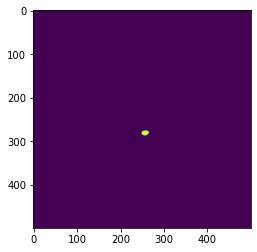

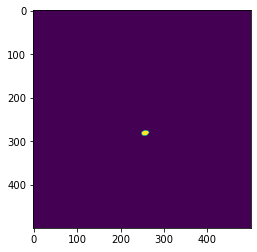

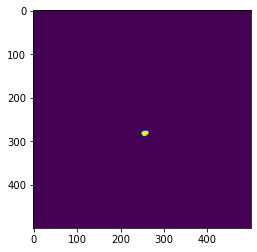

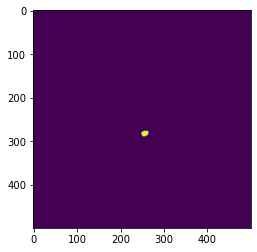

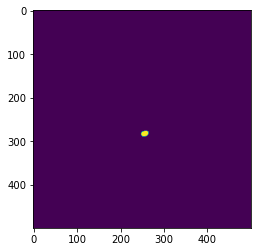

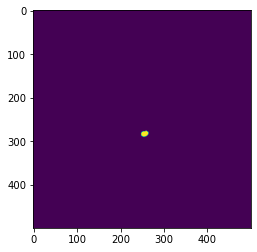

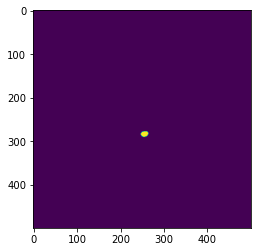

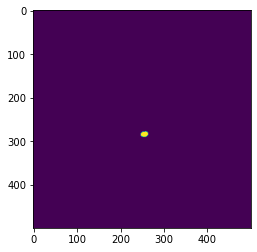

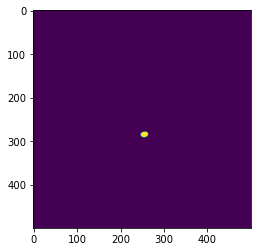

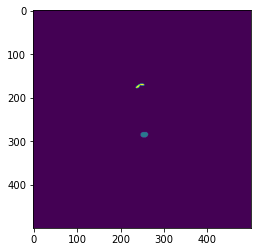

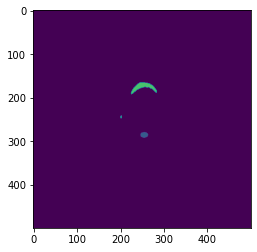

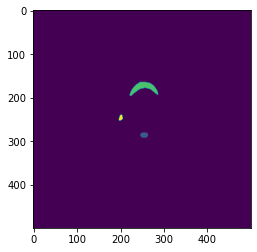

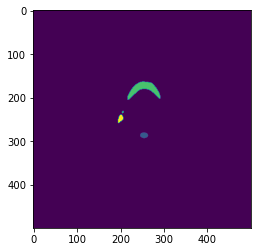

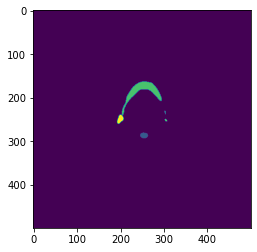

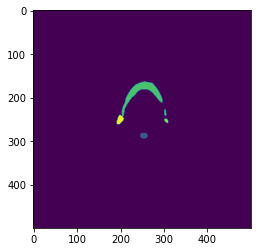

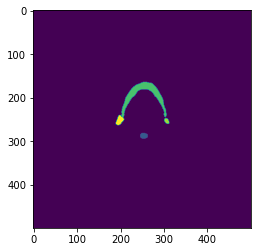

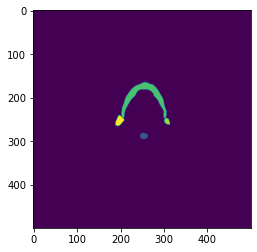

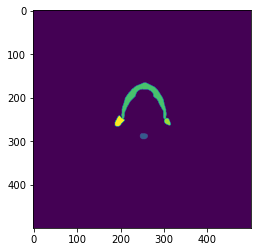

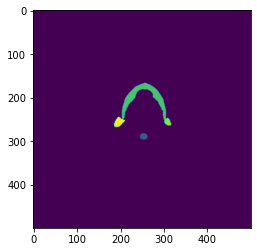

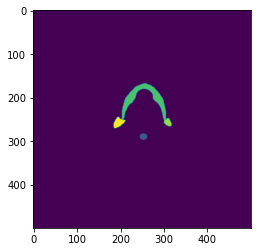

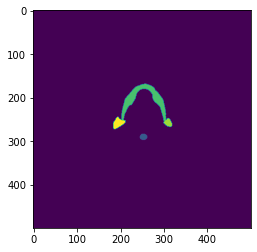

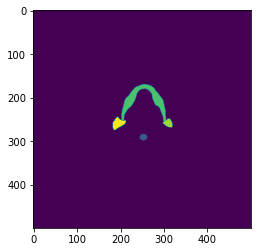

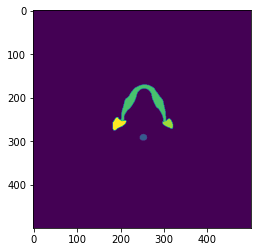

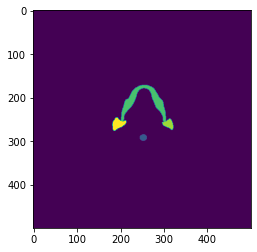

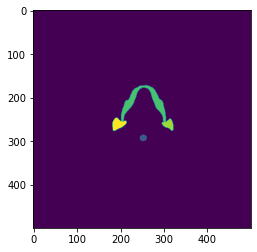

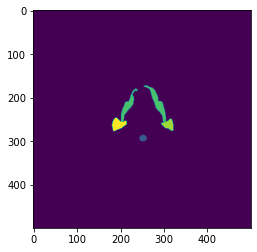

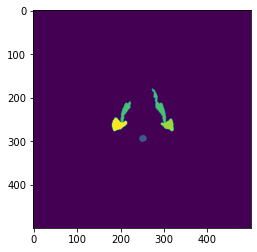

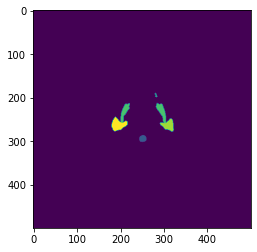

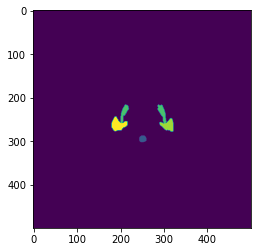

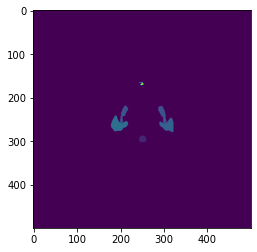

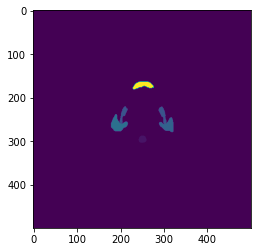

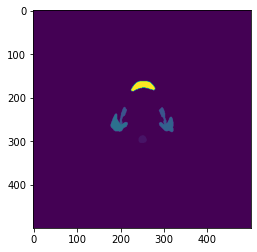

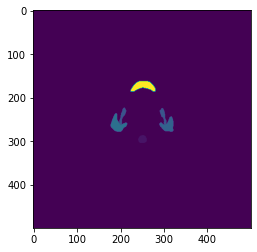

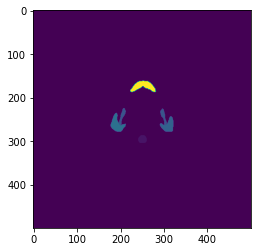

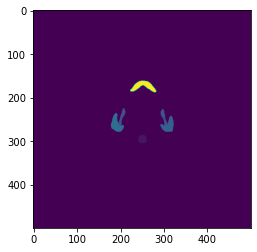

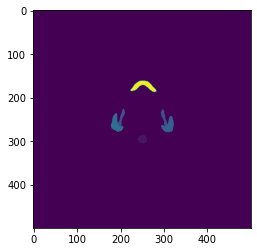

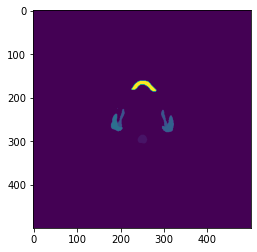

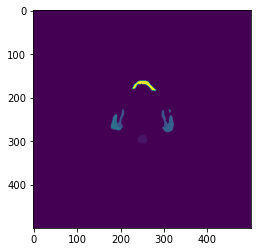

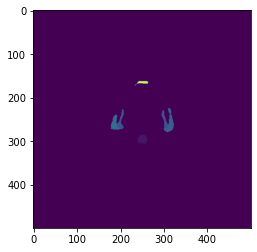

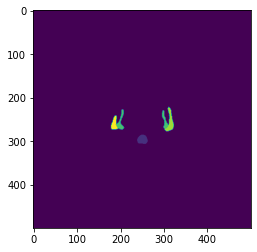

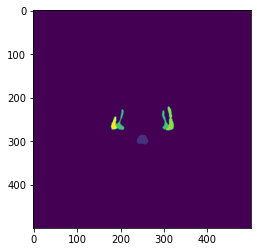

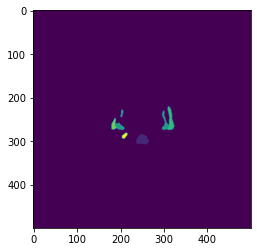

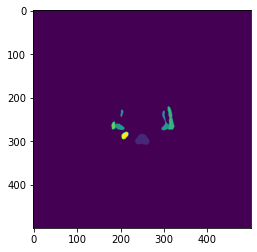

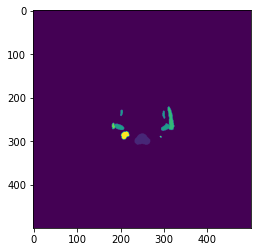

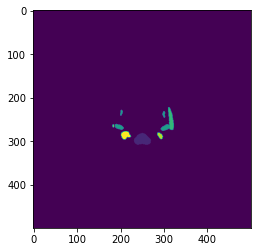

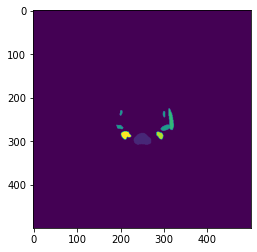

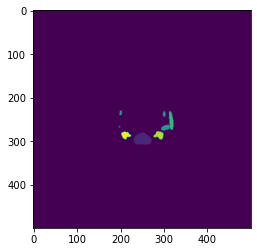

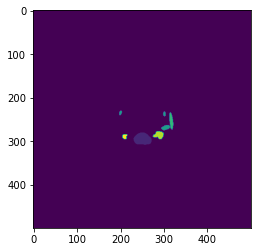

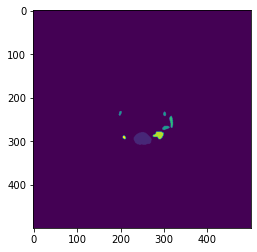

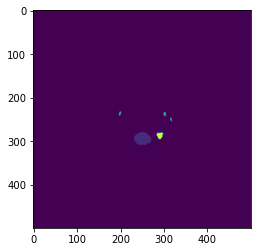

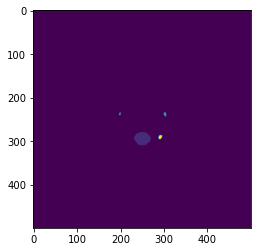

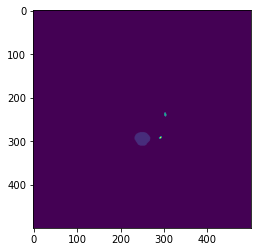

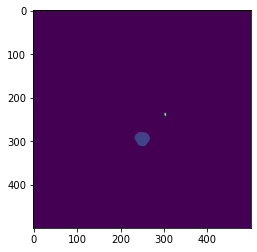

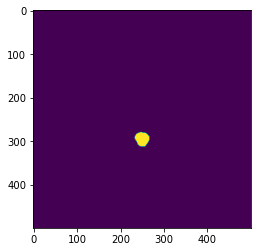

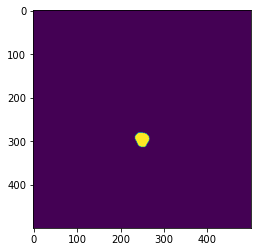

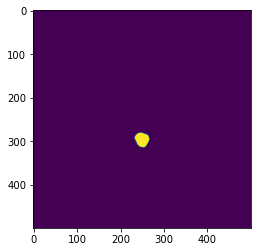

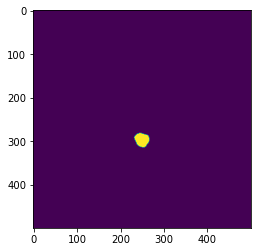

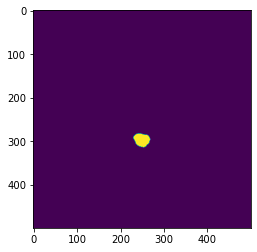

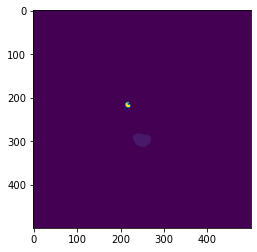

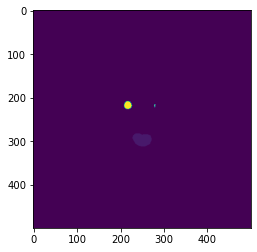

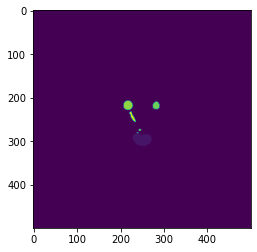

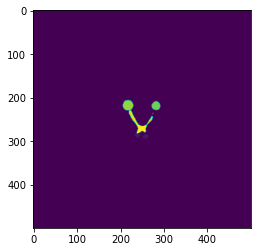

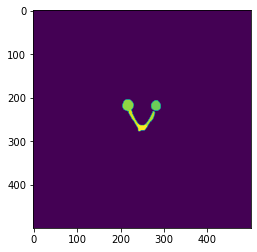

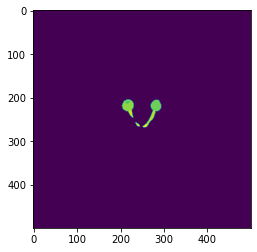

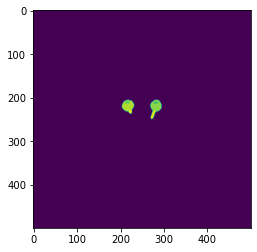

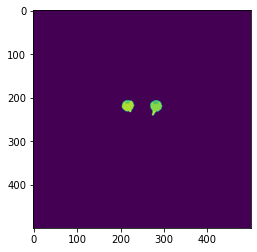

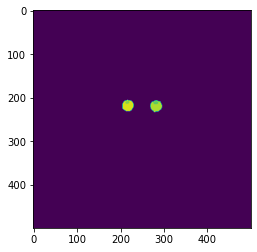

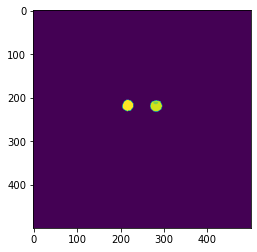

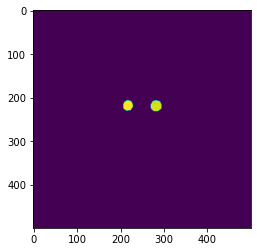

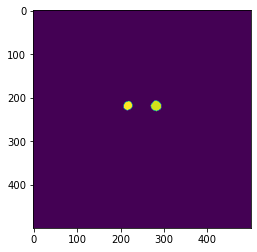

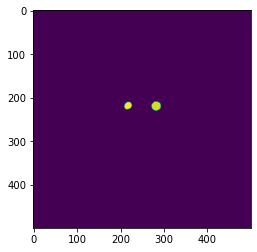

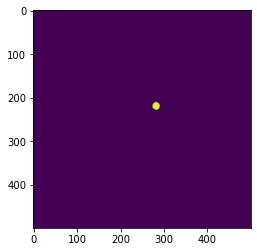

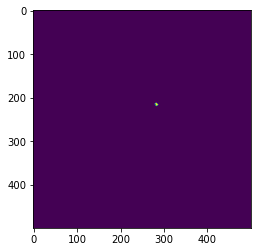

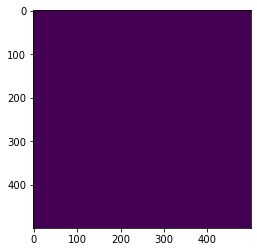

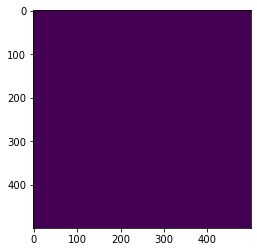

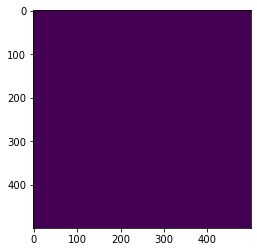

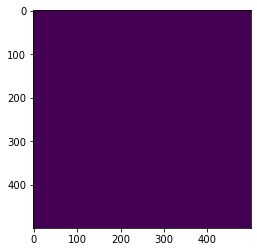

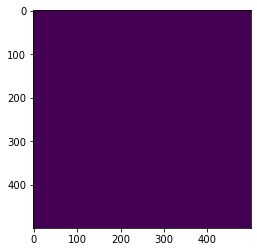

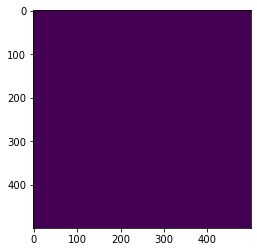

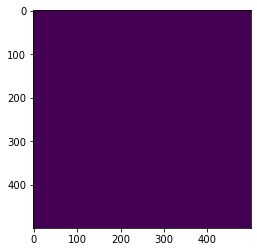

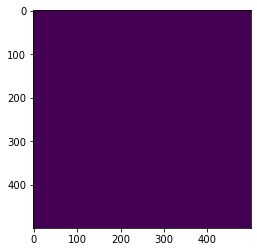

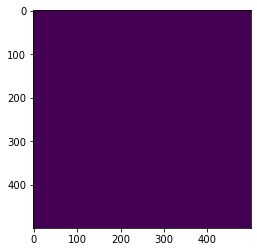

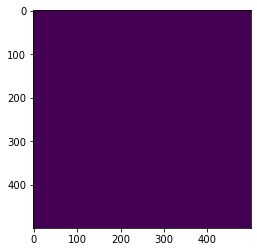

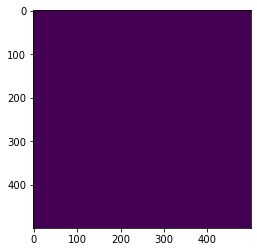

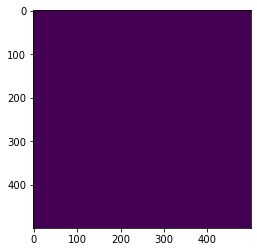

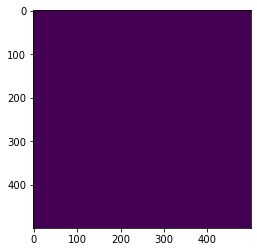

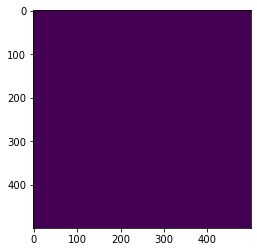

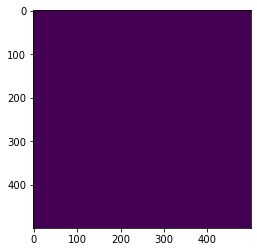

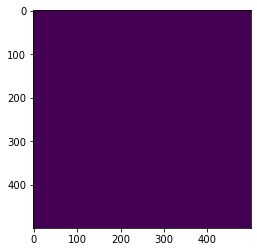

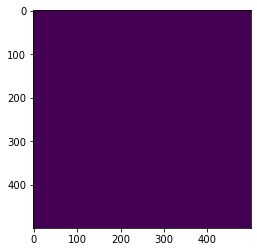

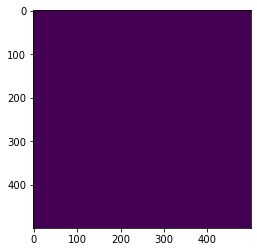

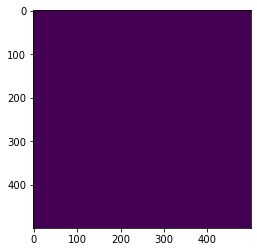

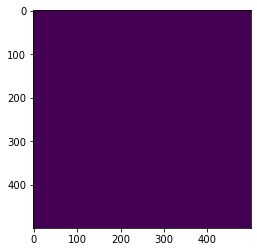

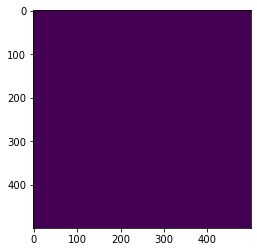

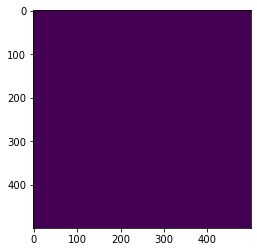

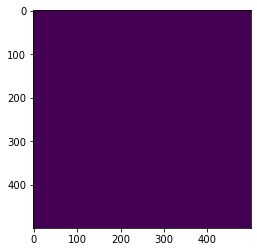

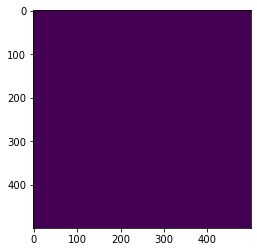

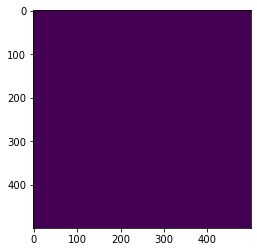

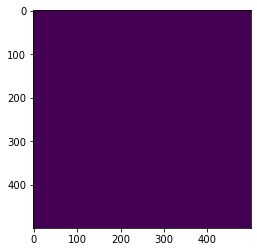

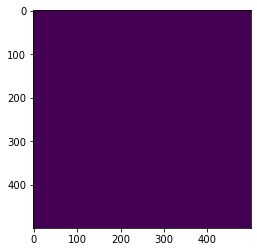

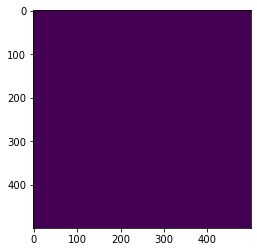

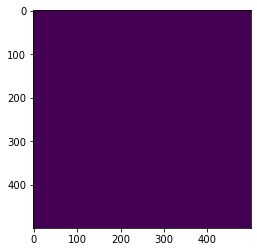

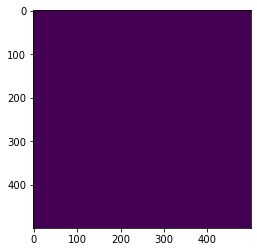

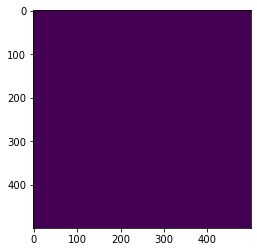

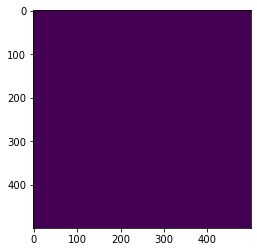

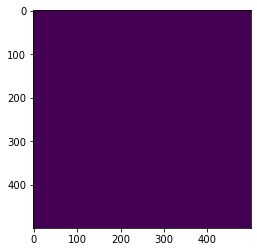

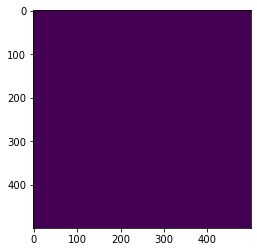

In [12]:
for i, val in enumerate(outputs):
    plt.imshow(val)
    plt.show()

In [8]:
targets[targets==1]

tensor([1, 1, 1,  ..., 1, 1, 1])